## 01. 당월 기준 잔액 (B0M) 
- '잔액_일시불_B0M', '잔액_할부_B0M', '잔액_현금서비스_B0M','잔액_리볼빙일시불이월_B0M', '잔액_리볼빙CA이월_B0M', '잔액_카드론_B0M',
- '월중평잔_일시불_B0M', '월중평잔_할부_B0M','월중평잔_CA_B0M',
- '잔액_할부_유이자_B0M', '잔액_할부_무이자_B0M', '잔액_할부_해외_B0M'

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd

# Mac에서는 "AppleGothic" 사용
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

In [3]:
import pandas as pd

# 분석에 필요한 컬럼만 지정
cols = ['잔액_일시불_B0M', '잔액_할부_B0M', '잔액_현금서비스_B0M','잔액_리볼빙일시불이월_B0M', '잔액_리볼빙CA이월_B0M', '잔액_카드론_B0M',
'월중평잔_일시불_B0M', '월중평잔_할부_B0M','월중평잔_CA_B0M',
'잔액_할부_유이자_B0M', '잔액_할부_무이자_B0M', '잔액_할부_해외_B0M', 'Segment', 'ID']

# 필요한 컬럼만 불러오기
df = pd.read_csv("../data/train/5.잔액정보/train_잔액정보_clesr.csv", usecols=cols)
df

,ID,잔액_일시불_B0M,잔액_할부_B0M,잔액_현금서비스_B0M,잔액_리볼빙일시불이월_B0M,잔액_리볼빙CA이월_B0M,잔액_카드론_B0M,월중평잔_일시불_B0M,월중평잔_할부_B0M,월중평잔_CA_B0M,잔액_할부_유이자_B0M,잔액_할부_무이자_B0M,잔액_할부_해외_B0M,Segment
0,TRAIN_000000,998,962,22971,0,0,0,1084,547,25032,0,962,0,D
1,TRAIN_000001,2565,2390,0,0,0,0,4090,2553,0,2390,0,0,E
2,TRAIN_000002,5312,5113,21531,6795,0,0,5006,8778,19420,0,5113,0,C
3,TRAIN_000003,730,5025,26284,0,0,0,487,5607,31250,2368,2657,0,D
4,TRAIN_000004,0,0,0,0,0,0,0,0,0,0,0,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,TRAIN_399995,0,0,0,0,0,0,0,0,0,0,0,0,E
2399996,TRAIN_399996,3351,0,0,0,0,27337,4412,0,0,0,0,0,D
2399997,TRAIN_399997,2524,2960,0,0,0,0,2694,3374,0,0,2960,0,C
2399998,TRAIN_399998,0,0,0,0,0,0,0,0,0,0,0,0,E


In [4]:
print("데이터 타입 확인:")
print(df.dtypes)

print("\n결측치 개수 확인:")
print(df.isnull().sum())

데이터 타입 확인:
ID                 object
잔액_일시불_B0M          int64
잔액_할부_B0M           int64
잔액_현금서비스_B0M        int64
잔액_리볼빙일시불이월_B0M     int64
잔액_리볼빙CA이월_B0M      int64
잔액_카드론_B0M          int64
월중평잔_일시불_B0M        int64
월중평잔_할부_B0M         int64
월중평잔_CA_B0M         int64
잔액_할부_유이자_B0M       int64
잔액_할부_무이자_B0M       int64
잔액_할부_해외_B0M        int64
Segment            object
dtype: object

결측치 개수 확인:
ID                 0
잔액_일시불_B0M         0
잔액_할부_B0M          0
잔액_현금서비스_B0M       0
잔액_리볼빙일시불이월_B0M    0
잔액_리볼빙CA이월_B0M     0
잔액_카드론_B0M         0
월중평잔_일시불_B0M       0
월중평잔_할부_B0M        0
월중평잔_CA_B0M        0
잔액_할부_유이자_B0M      0
잔액_할부_무이자_B0M      0
잔액_할부_해외_B0M       0
Segment            0
dtype: int64


In [32]:
df['잔액_리볼빙일시불이월_B0M'].value_counts()

잔액_리볼빙일시불이월_B0M
0        2333736
14305         16
12299         15
8882          15
8983          15
          ...   
23070          1
17773          1
20458          1
17576          1
17390          1
Name: count, Length: 16808, dtype: int64

In [6]:
df.groupby('Segment')[['잔액_일시불_B0M','잔액_현금서비스_B0M','잔액_리볼빙일시불이월_B0M','잔액_리볼빙CA이월_B0M','잔액_카드론_B0M']].mean().T

Segment,A,B,C,D,E
잔액_일시불_B0M,20699.614198,19377.381944,11505.366870,7208.856063,2039.213382
잔액_현금서비스_B0M,8752.090535,11629.368056,4226.658735,1668.581571,294.962003
잔액_리볼빙일시불이월_B0M,529.664609,796.027778,626.707908,716.807927,263.550598
잔액_리볼빙CA이월_B0M,123.543210,0.000000,4.408551,10.023857,6.523354
잔액_카드론_B0M,3313.561728,6171.361111,3642.244267,3581.438049,2179.023688


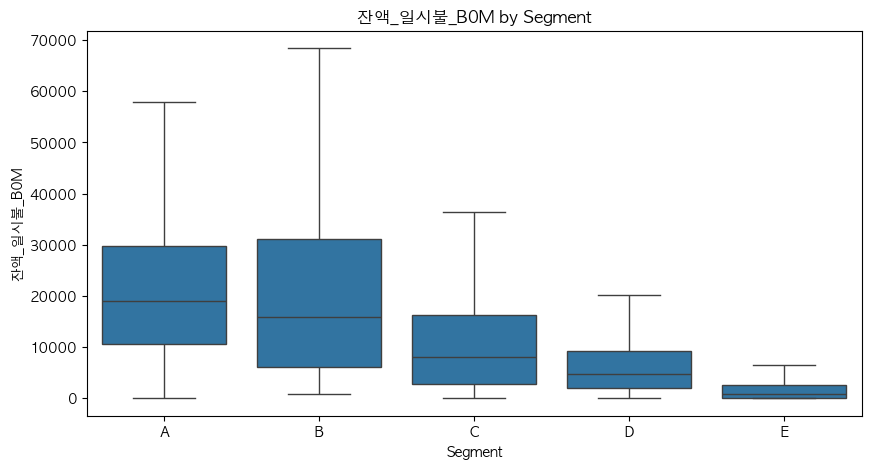

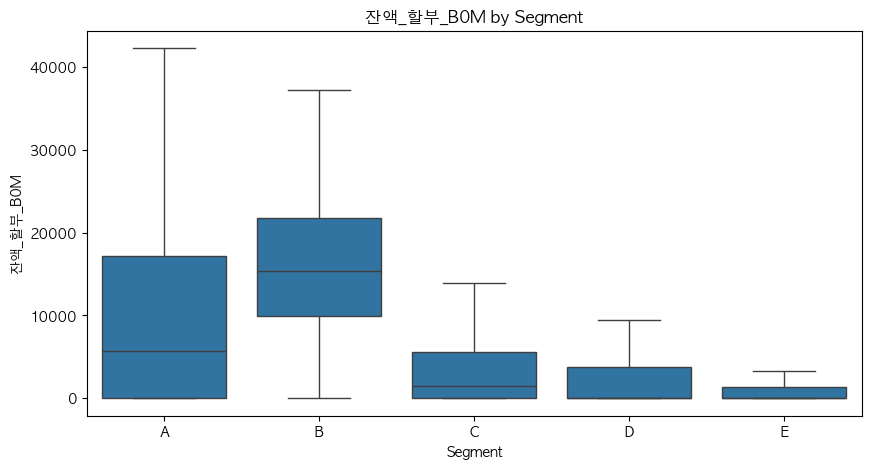

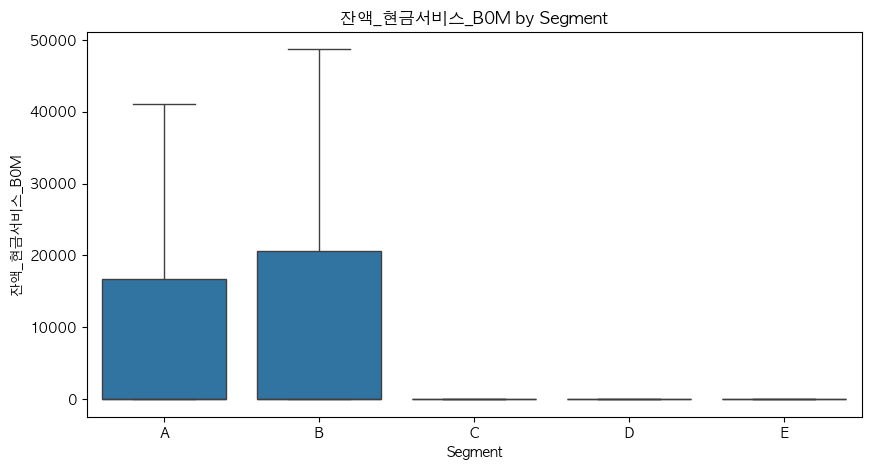

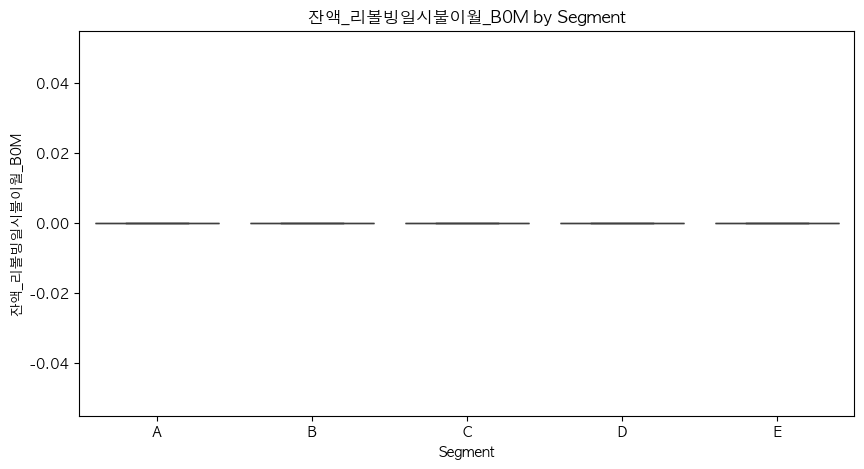

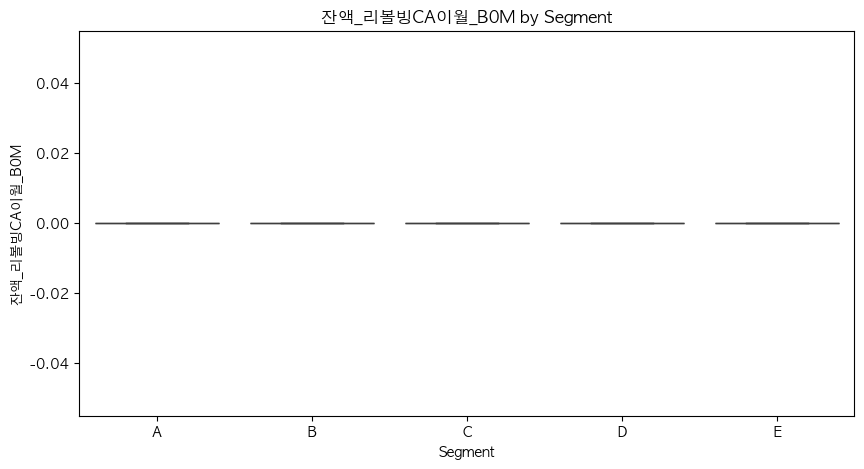

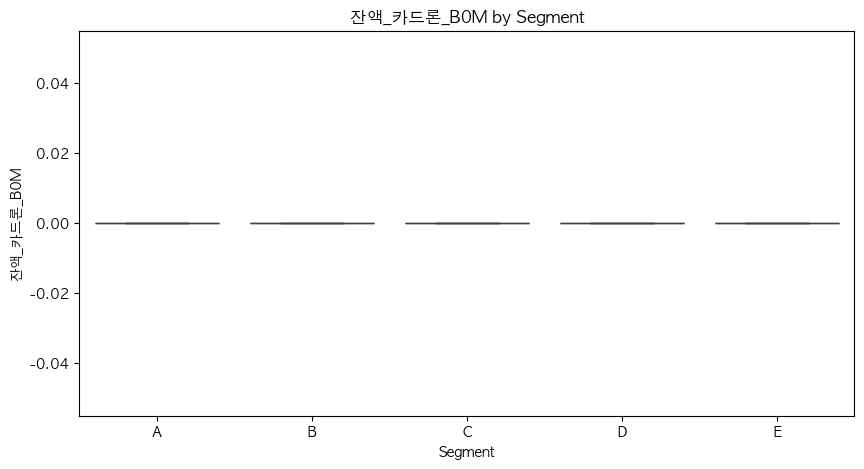

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

features = [
    '잔액_일시불_B0M', '잔액_할부_B0M', '잔액_현금서비스_B0M',
    '잔액_리볼빙일시불이월_B0M', '잔액_리볼빙CA이월_B0M', '잔액_카드론_B0M'
]

for col in features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Segment', y=col, data=df, order=['A', 'B', 'C', 'D', 'E'],showfliers=False)
    plt.title(f"{col} by Segment")
    plt.show()

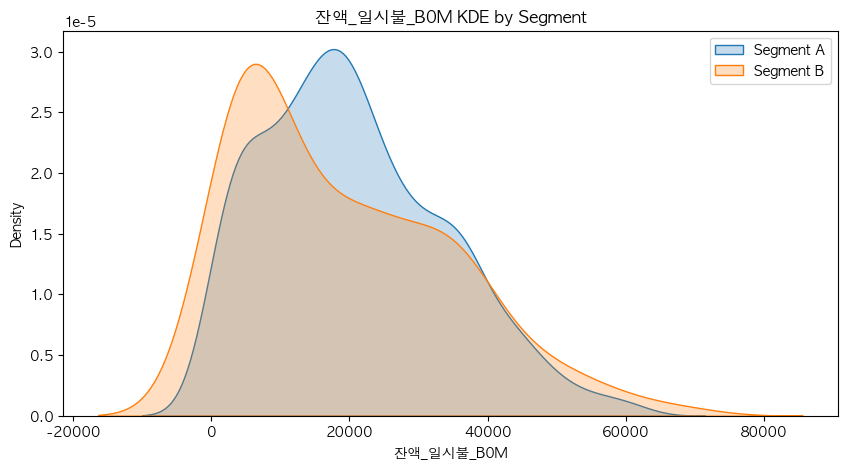

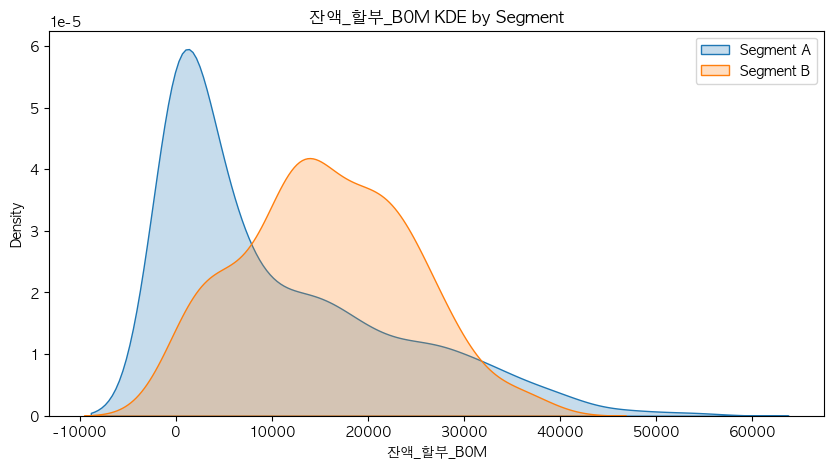

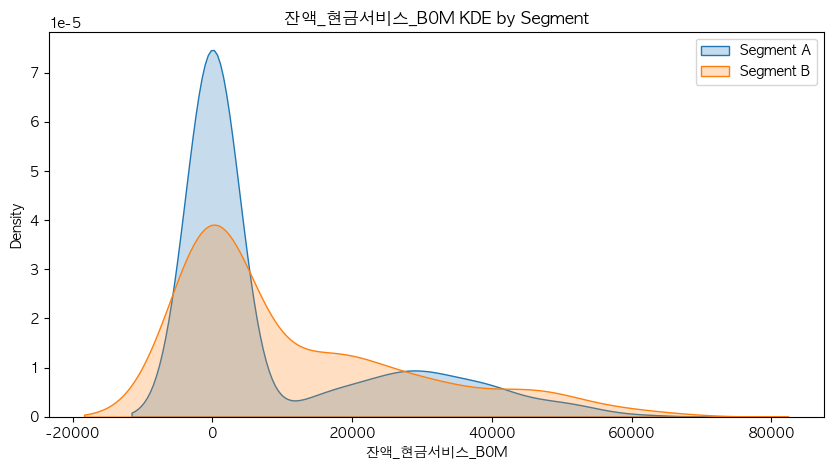

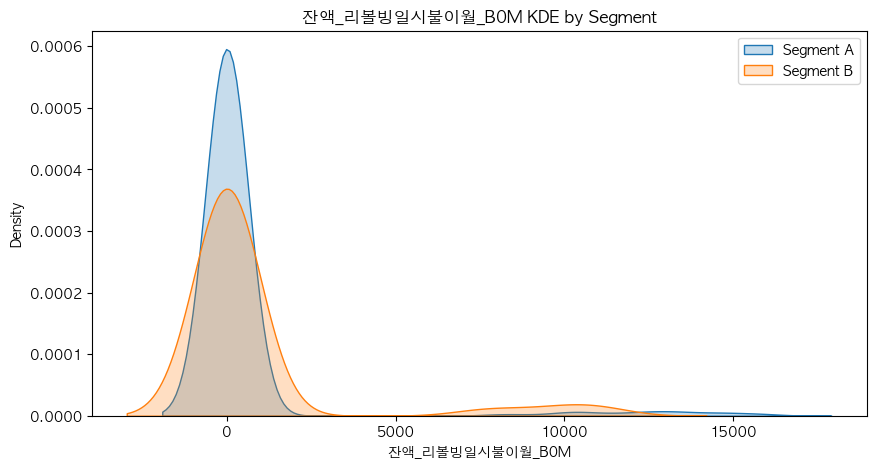

/var/folders/9v/p8kw589x7sd3tm06pqv49gx80000gn/T/ipykernel_18315/2844404144.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ab_df[ab_df['Segment'] == seg][col], label=f'Segment {seg}', fill=True)


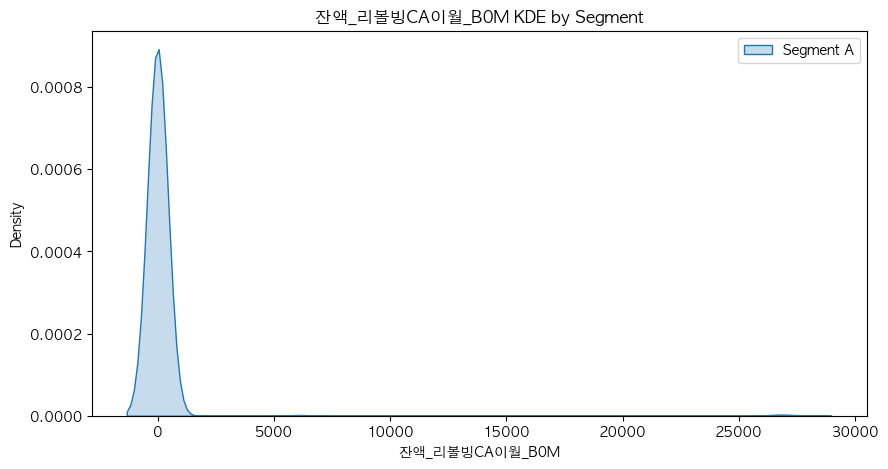

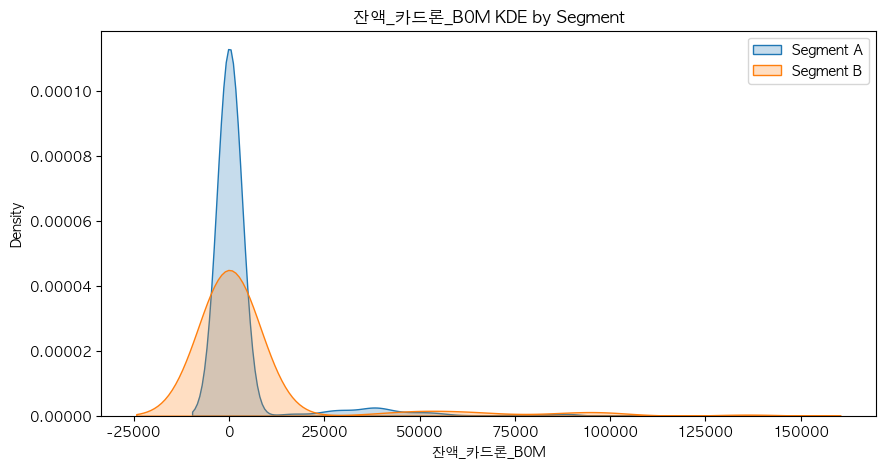

In [8]:
ab_df = df[df['Segment'].isin(['A', 'B'])]

for col in features:
    plt.figure(figsize=(10, 5))
    for seg in sorted(ab_df['Segment'].unique()):
        sns.kdeplot(ab_df[ab_df['Segment'] == seg][col], label=f'Segment {seg}', fill=True)
    plt.title(f"{col} KDE by Segment")
    plt.legend()
    plt.show()

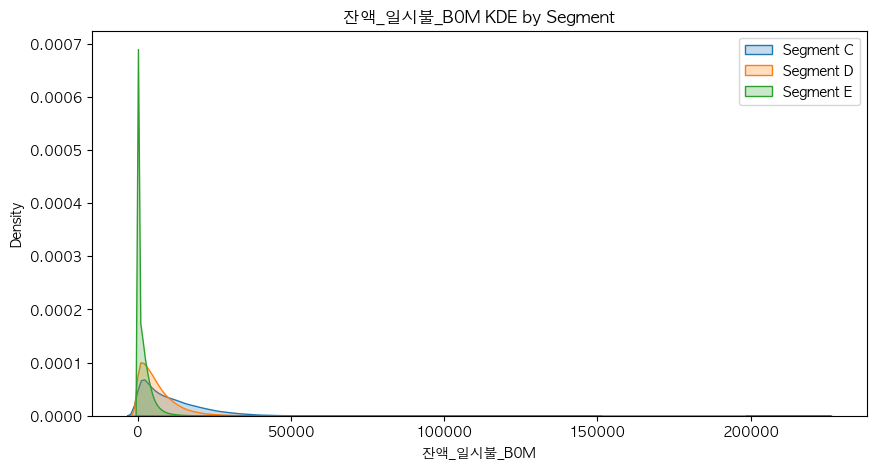

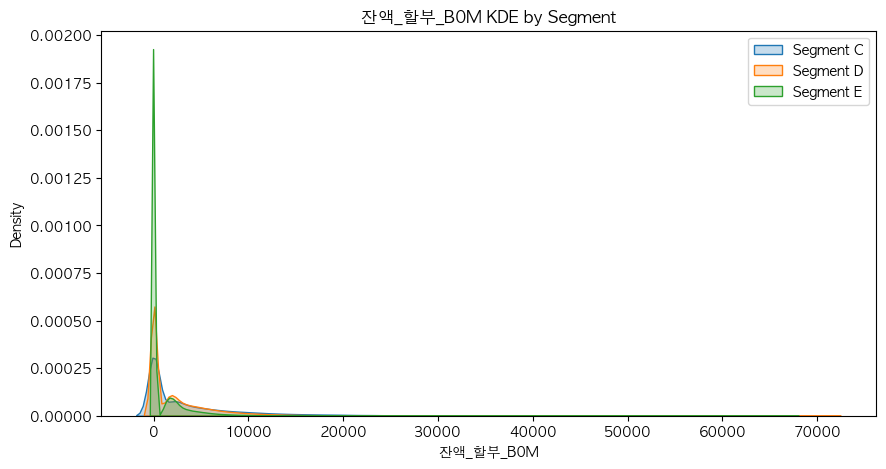

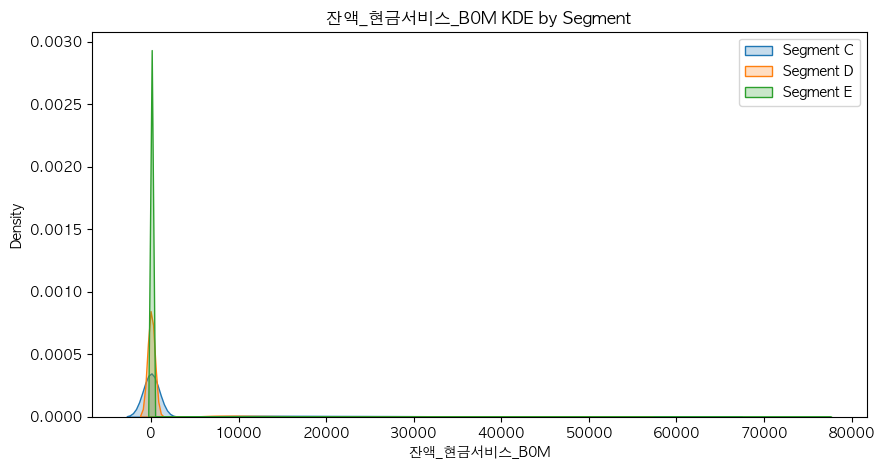

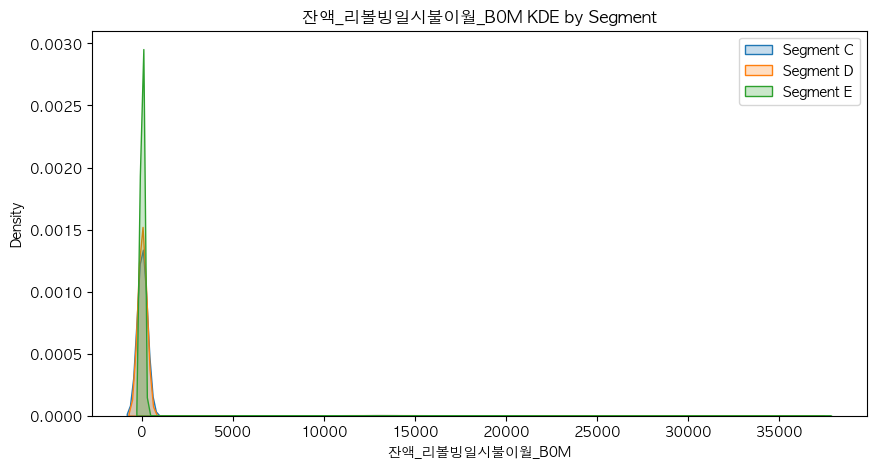

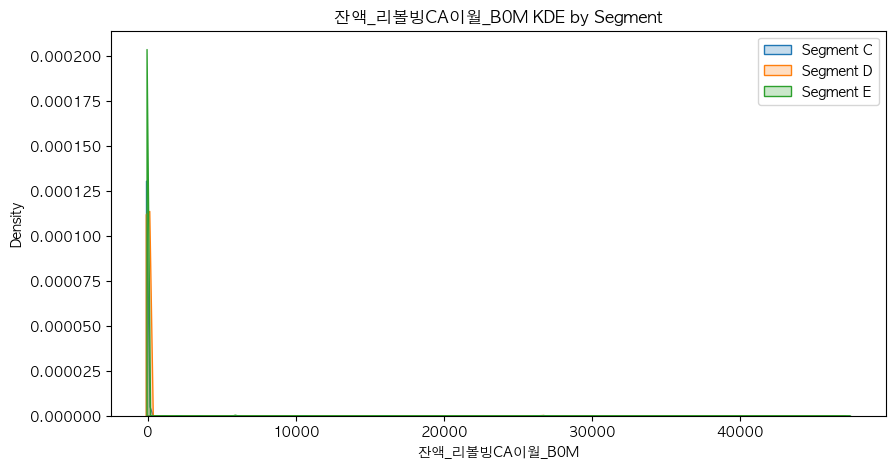

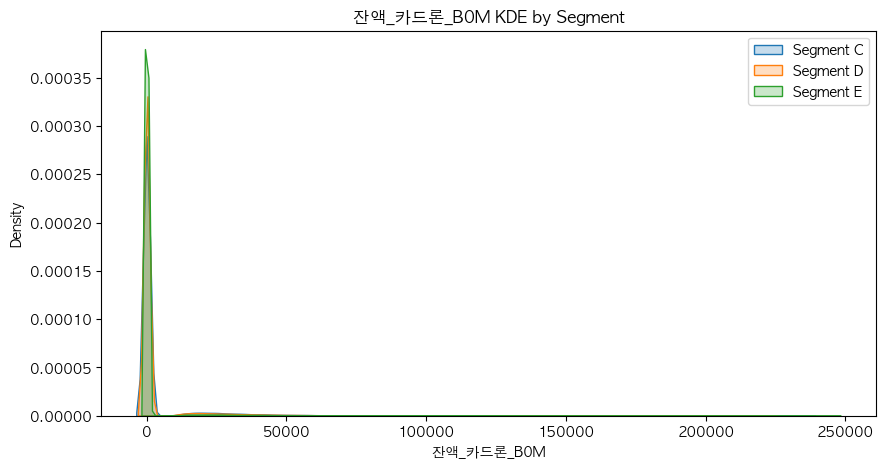

In [9]:
ab_df = df[df['Segment'].isin(['C', 'D', 'E'])]

for col in features:
    plt.figure(figsize=(10, 5))
    for seg in sorted(ab_df['Segment'].unique()):
        sns.kdeplot(ab_df[ab_df['Segment'] == seg][col], label=f'Segment {seg}', fill=True)
    plt.title(f"{col} KDE by Segment")
    plt.legend()
    plt.show()

- A: 잔액_일시불 많고 B: 잔액_할부 많음

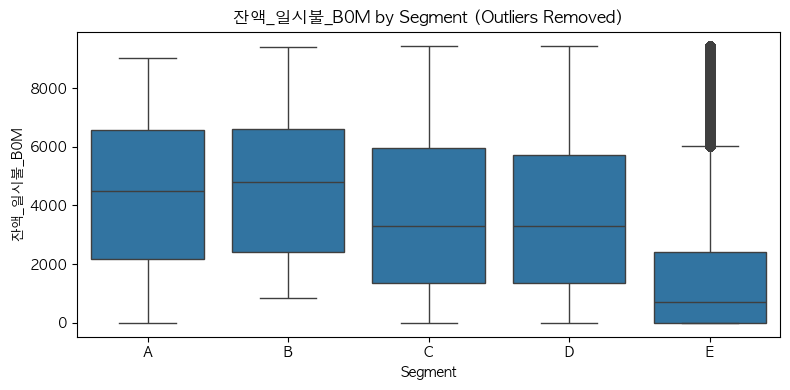

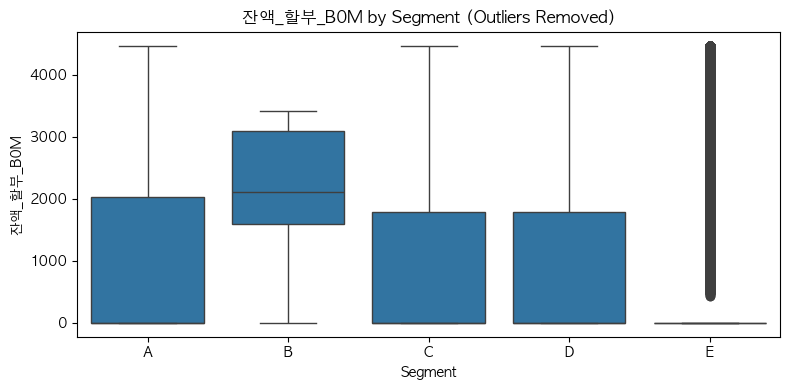

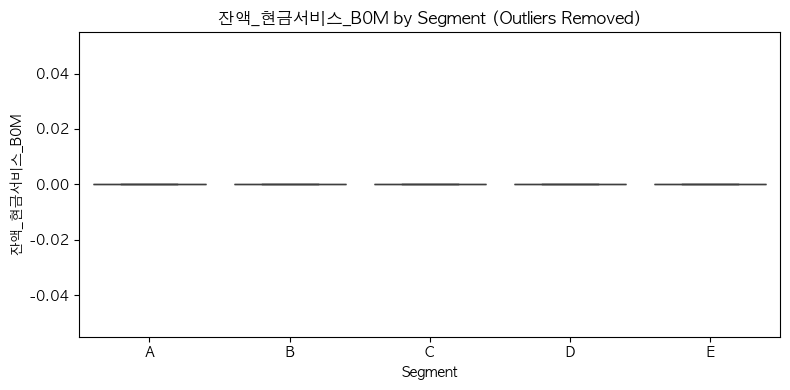

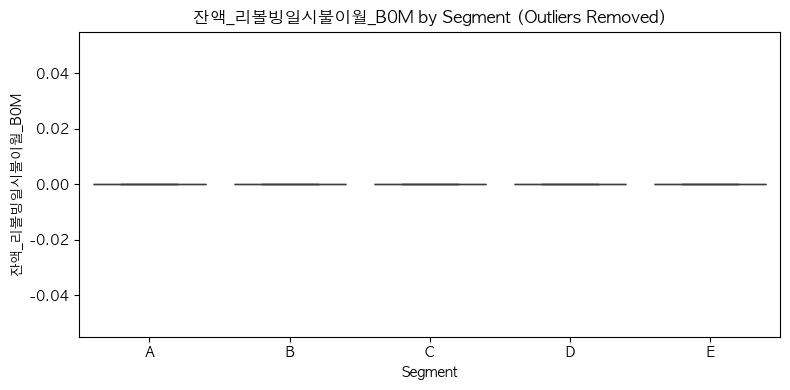

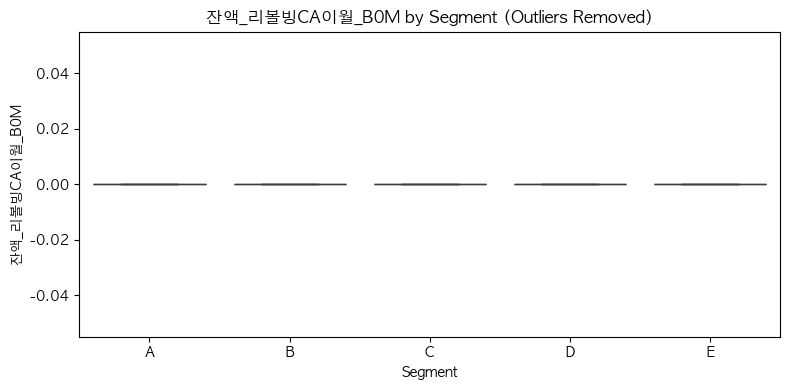

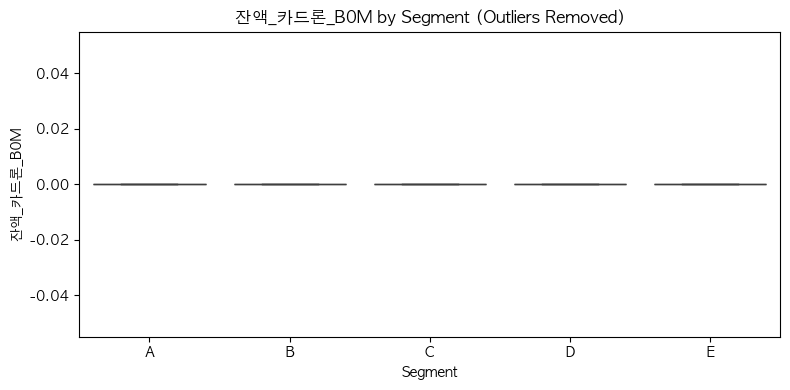

In [20]:
# Segment 순서를 고정 (A~E)
segment_order = ['A', 'B', 'C', 'D', 'E']

# 이상치 제거 함수 (IQR 방식)
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

# 각 컬럼별로 이상치 제거 후 boxplot 시각화
for col in features:
    filtered_df = remove_outliers_iqr(df, col)

    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Segment', y=col, data=filtered_df, order=segment_order)
    plt.title(f"{col} by Segment (Outliers Removed)")
    plt.tight_layout()
    plt.show()

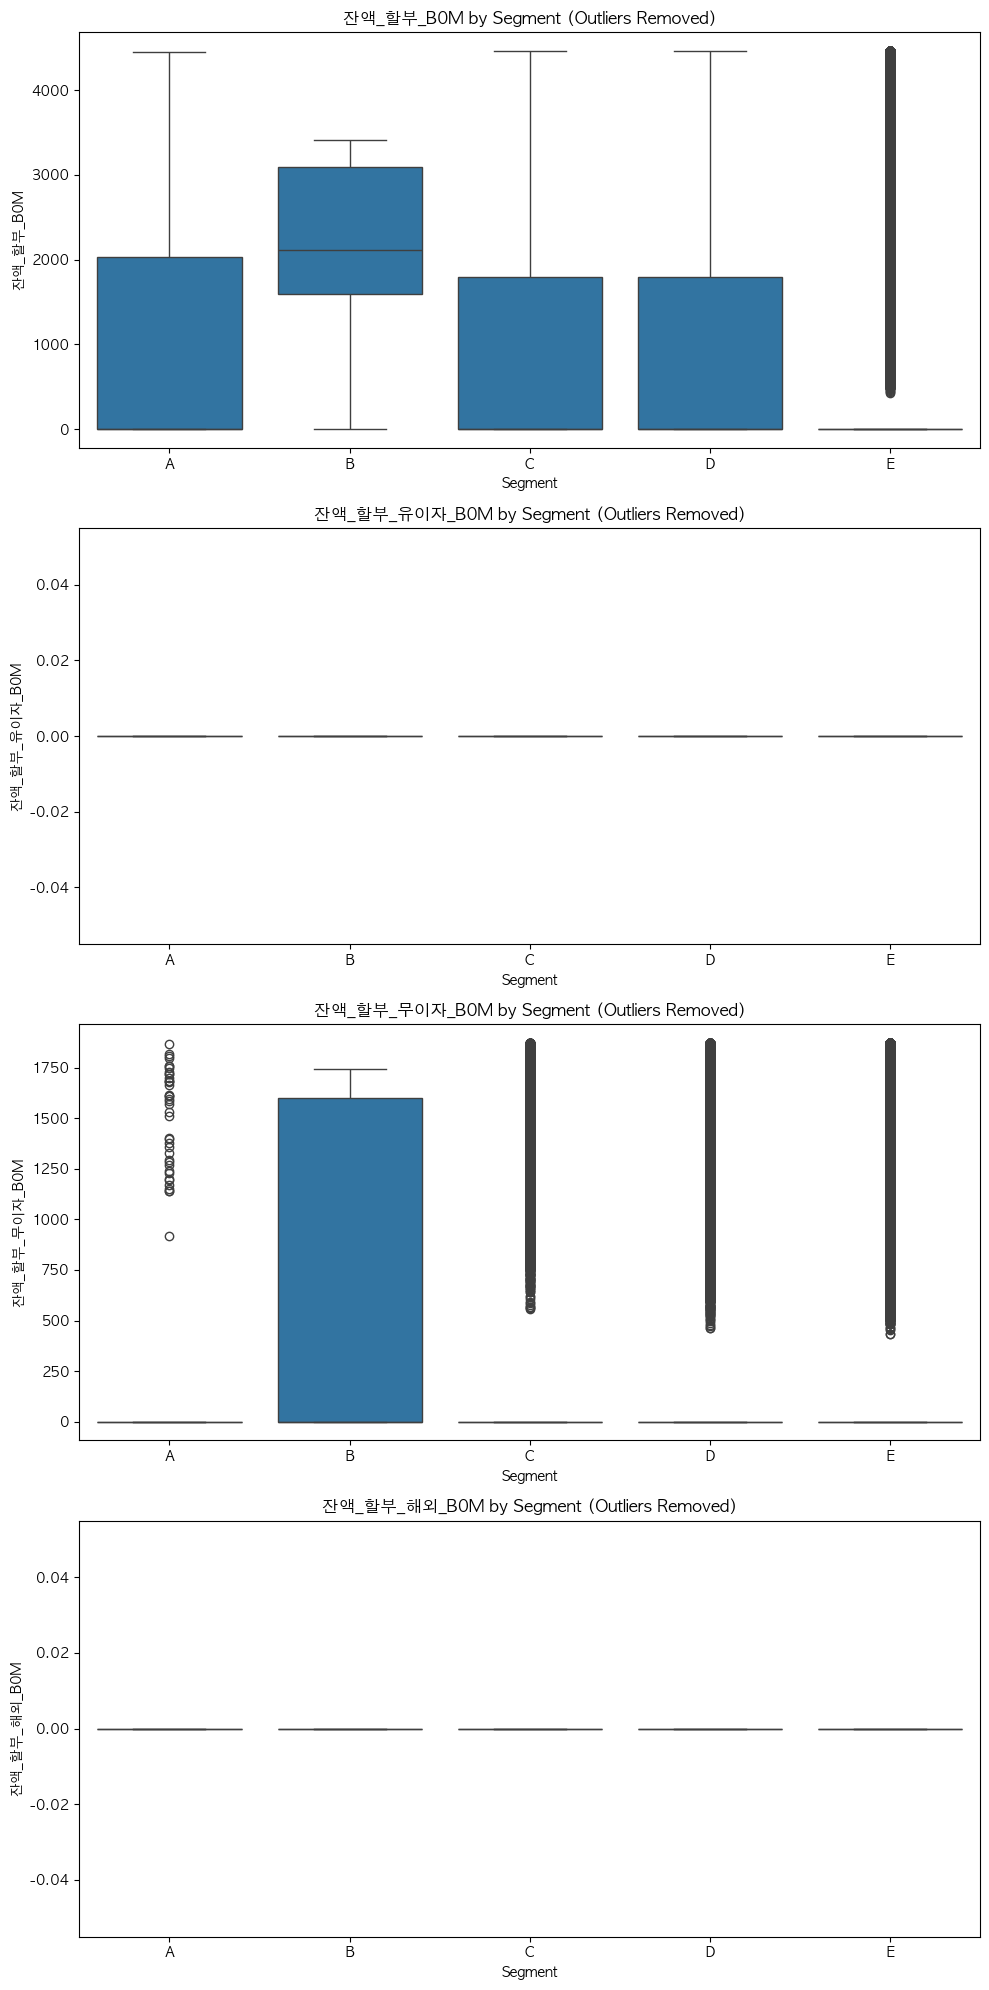

In [38]:
# 사용할 컬럼 목록
cols = [
    '잔액_할부_B0M',
    '잔액_할부_유이자_B0M',
    '잔액_할부_무이자_B0M',
    '잔액_할부_해외_B0M',
    'Segment'
]

segment_order = ['A', 'B', 'C', 'D', 'E']


# 이상치 제거를 위한 함수 (IQR 기반)
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    return data[(data[column] >= Q1 - 1.5 * IQR) & (data[column] <= Q3 + 1.5 * IQR)]

# 시각화
plt.figure(figsize=(10, 20))
for i, col in enumerate(cols[:-1]):
    plt.subplot(4, 1, i+1)
    filtered_df = remove_outliers_iqr(df, col)
    sns.boxplot(data=filtered_df, x='Segment', y=col, order=segment_order)
    plt.title(f"{col} by Segment (Outliers Removed)")

plt.tight_layout()
plt.show()


In [58]:
df['잔액_할부_해외_B0M'].value_counts()

잔액_할부_해외_B0M
0       2399472
6041          6
6039          5
6017          4
6029          4
         ...   
6430          1
6126          1
6109          1
6068          1
6135          1
Name: count, Length: 349, dtype: int64

In [50]:
zero_df = df[df['잔액_할부_해외_B0M'] == 0]
segment_counts = zero_df['Segment'].value_counts().sort_index()
print(segment_counts)

Segment
A        972
B        144
C     127520
D     349086
E    1921750
Name: count, dtype: int64


In [56]:
zero_df = df[df['잔액_할부_유이자_B0M'] == 0]
zero_segment_pct = zero_df['Segment'].value_counts(normalize=True).sort_index() * 100
print("잔액_할부_해외_B0M == 0 인 경우의 Segment 비율 (%):\n", zero_segment_pct)


잔액_할부_해외_B0M == 0 인 경우의 Segment 비율 (%):
 Segment
A     0.041593
B     0.005977
C     4.822480
D    13.029134
E    82.100816
Name: proportion, dtype: float64


In [54]:
total_segment_pct = df['Segment'].value_counts(normalize=True).sort_index() * 100
print("전체 Segment 비율 (%):\n", total_segment_pct)


전체 Segment 비율 (%):
 Segment
A     0.04050
B     0.00600
C     5.31625
D    14.55175
E    80.08550
Name: proportion, dtype: float64


In [67]:
df['월중평잔_일시불_B0M'].value_counts()

월중평잔_일시불_B0M
0         665570
7           1573
8           1535
9           1257
10          1029
           ...  
51575          1
40005          1
42808          1
119045         1
54127          1
Name: count, Length: 50150, dtype: int64

<Figure size 1200x600 with 0 Axes>

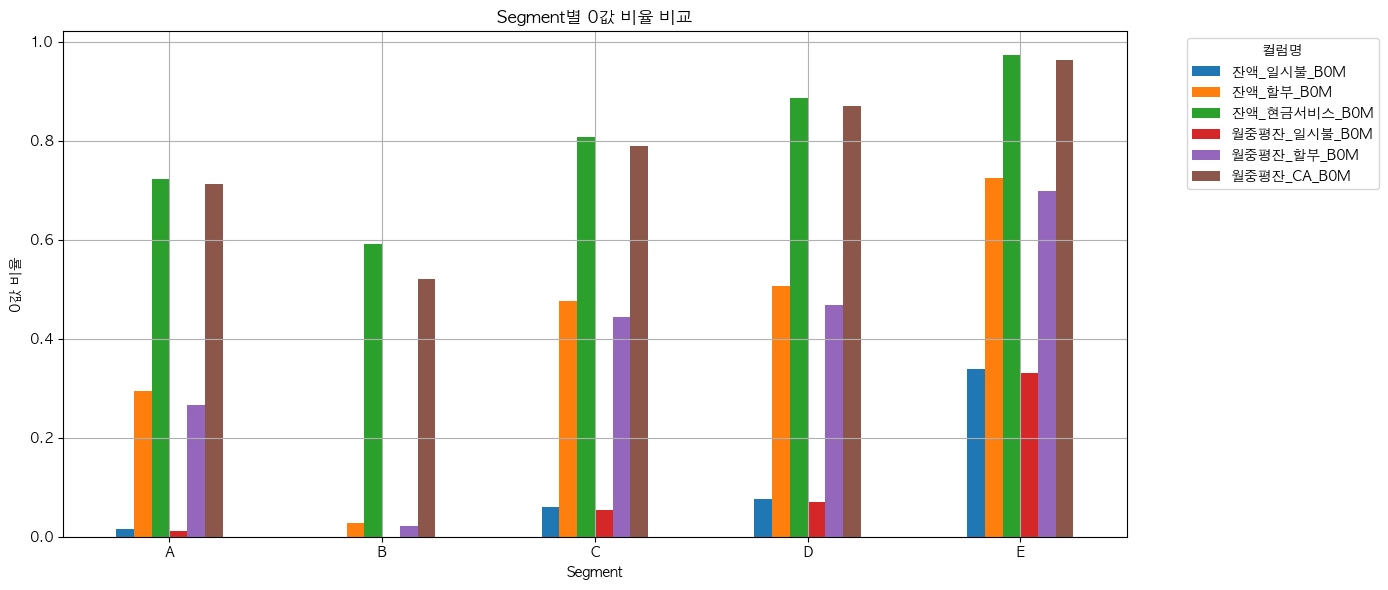

In [75]:
# 비교할 컬럼 목록
balance_cols = ['잔액_일시불_B0M', '잔액_할부_B0M', '잔액_현금서비스_B0M']
avg_cols = ['월중평잔_일시불_B0M', '월중평잔_할부_B0M', '월중평잔_CA_B0M']

# 세그먼트별 전체 수 (비율 계산용)
segment_total = df['Segment'].value_counts().sort_index()

# 결과 저장용 딕셔너리
zero_ratio_results = {}

# 각 컬럼별 0 값 비율을 Segment별로 계산
for col in balance_cols + avg_cols:
    zero_df = df[df[col] == 0]
    zero_segment_counts = zero_df['Segment'].value_counts().sort_index()
    zero_segment_ratio = (zero_segment_counts / segment_total).fillna(0)
    zero_ratio_results[col] = zero_segment_ratio

# 데이터프레임으로 정리
zero_ratio_df = pd.DataFrame(zero_ratio_results).T  # 전치하여 보기 편하게

# 결과 확인
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
zero_ratio_df.T.plot(kind='bar', figsize=(14, 6), title='Segment별 0값 비율 비교')
plt.ylabel("0값 비율")
plt.xlabel("Segment")
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(title='컬럼명', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

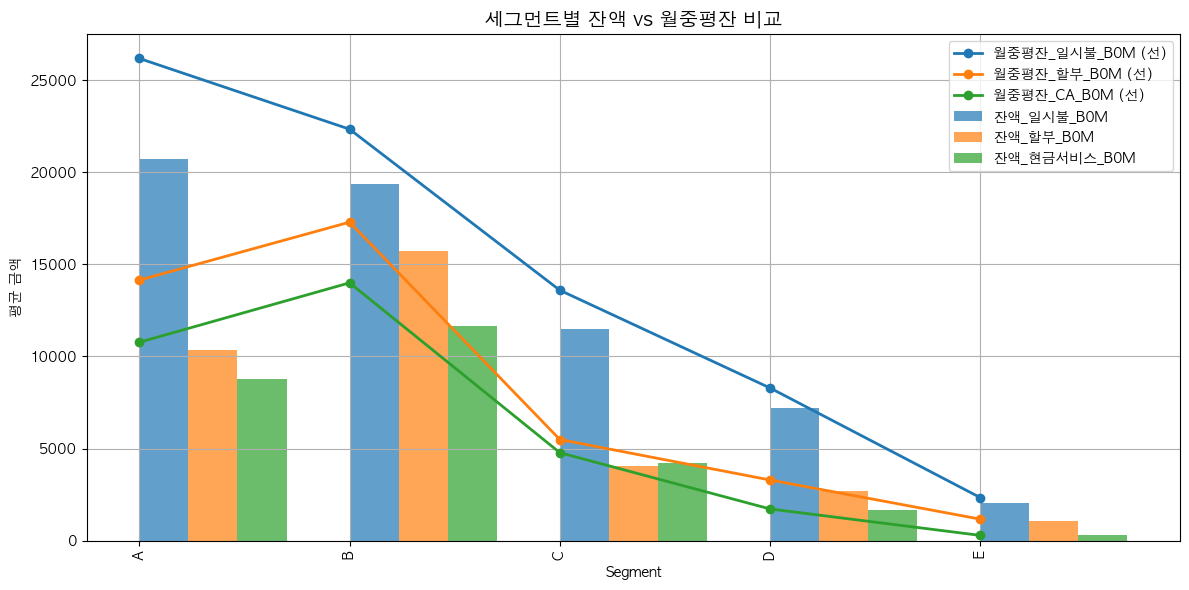

In [77]:
import matplotlib.pyplot as plt

# 비교할 컬럼들
balance_cols = ['잔액_일시불_B0M', '잔액_할부_B0M', '잔액_현금서비스_B0M']
avg_cols = ['월중평잔_일시불_B0M', '월중평잔_할부_B0M', '월중평잔_CA_B0M']

# 세그먼트별 평균값 계산
balance_means = df.groupby('Segment')[balance_cols].mean()
avg_means = df.groupby('Segment')[avg_cols].mean()

# 시각화
fig, ax = plt.subplots(figsize=(12, 6))

# 막대그래프: 잔액 계열
balance_means.plot(kind='bar', ax=ax, position=0, width=0.7, alpha=0.7)

# 선그래프: 월중평잔 계열
for col in avg_cols:
    ax.plot(avg_means.index, avg_means[col], marker='o', label=f"{col} (선)", linewidth=2)

# 라벨링 및 꾸미기
ax.set_title("세그먼트별 잔액 vs 월중평잔 비교", fontsize=14)
ax.set_ylabel("평균 금액")
ax.set_xlabel("Segment")
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()


## 02. 과거 월별 잔액 (B1M ~ B5M)
- '잔액_현금서비스_B1M', '잔액_현금서비스_B2M'
- '잔액_카드론_B1M' ~ '잔액_카드론_B5M'
- '잔액_할부_B1M', '잔액_할부_B2M'
- '잔액_일시불_B1M', '잔액_일시불_B2M'

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 필터할 컬럼
cols = [
    'Segment',
    '잔액_현금서비스_B0M', '잔액_카드론_B0M', '잔액_일시불_B0M', '잔액_할부_B0M',
    '잔액_현금서비스_B1M', '잔액_현금서비스_B2M',
    '잔액_카드론_B1M', '잔액_카드론_B2M', '잔액_카드론_B3M', '잔액_카드론_B4M', '잔액_카드론_B5M',
    '잔액_일시불_B1M', '잔액_일시불_B2M',
    '잔액_할부_B1M', '잔액_할부_B2M',
]

# 필요한 컬럼만 불러오기
df = pd.read_csv("../data/train/5.잔액정보/train_잔액정보_clesr.csv", usecols=cols)
df

KeyboardInterrupt: 

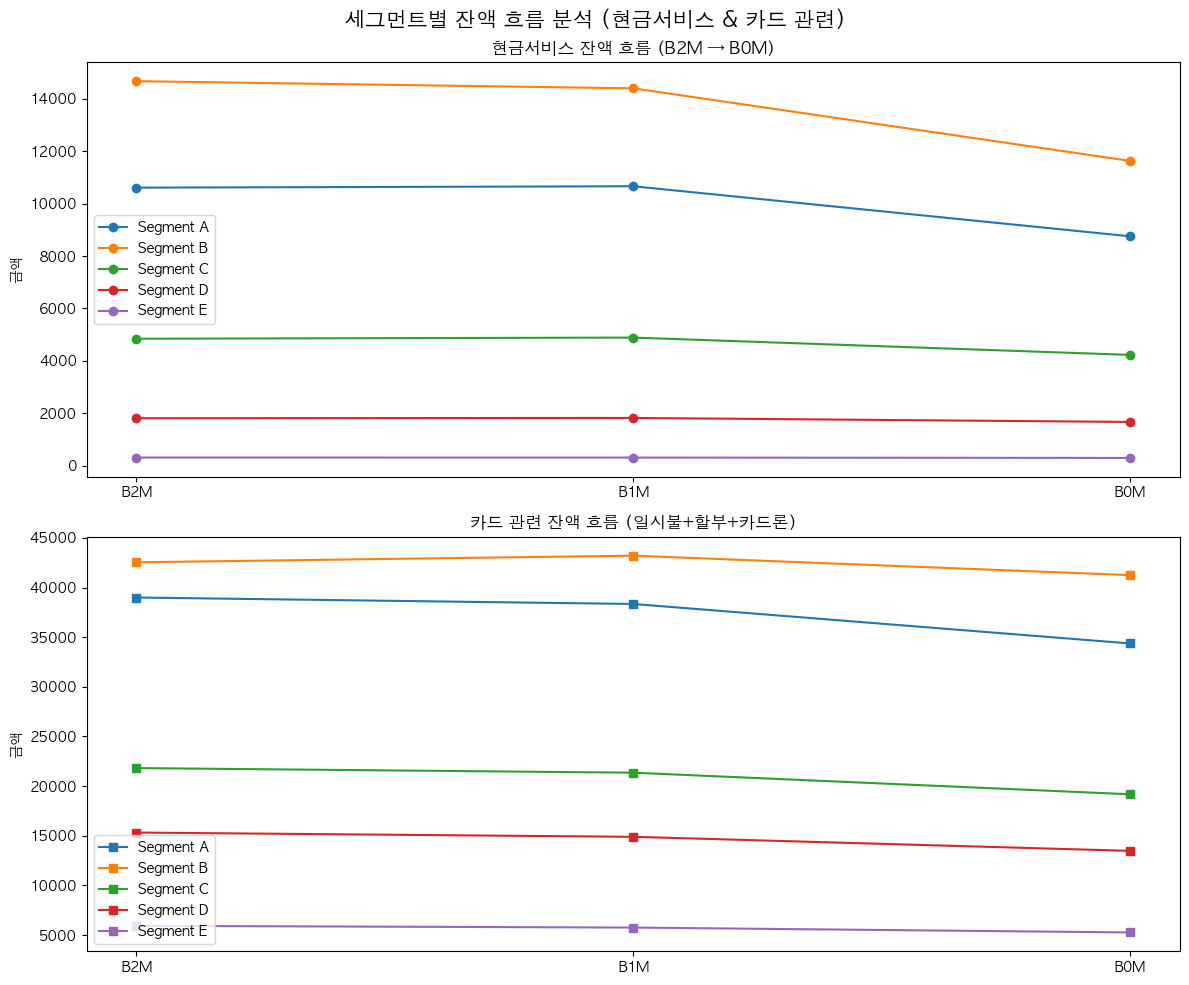

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 사용할 컬럼들 (Segment는 따로)
cols = [
    '잔액_현금서비스_B0M', '잔액_카드론_B0M', '잔액_일시불_B0M', '잔액_할부_B0M',
    '잔액_현금서비스_B1M', '잔액_현금서비스_B2M',
    '잔액_카드론_B1M', '잔액_카드론_B2M', '잔액_카드론_B3M', '잔액_카드론_B4M', '잔액_카드론_B5M',
    '잔액_일시불_B1M', '잔액_일시불_B2M',
    '잔액_할부_B1M', '잔액_할부_B2M',
]

# Segment가 문자형이니까 따로 저장
df_segment = df['Segment']

# 숫자형으로 강제 변환 (오류는 NaN으로)
df_numeric = df[cols].apply(pd.to_numeric, errors='coerce')

# 다시 Segment랑 붙여서 그룹화
df_numeric['Segment'] = df_segment
grouped = df_numeric.groupby('Segment').mean().sort_index()

# 시각화
fig, axs = plt.subplots(2, 1, figsize=(12, 10))
fig.suptitle('세그먼트별 잔액 흐름 분석 (현금서비스 & 카드 관련)', fontsize=15)

# 1️⃣ 현금서비스 흐름
for seg in grouped.index:
    axs[0].plot(['B2M', 'B1M', 'B0M'], [
        grouped.loc[seg, '잔액_현금서비스_B2M'],
        grouped.loc[seg, '잔액_현금서비스_B1M'],
        grouped.loc[seg, '잔액_현금서비스_B0M']
    ], marker='o', label=f'Segment {seg}')
axs[0].set_title('현금서비스 잔액 흐름 (B2M → B0M)')
axs[0].set_ylabel('금액')
axs[0].legend()

# 2️⃣ 카드 관련 흐름 (일시불 + 할부 + 카드론)
for seg in grouped.index:
    axs[1].plot(['B2M', 'B1M', 'B0M'], [
        grouped.loc[seg, '잔액_일시불_B2M'] + grouped.loc[seg, '잔액_할부_B2M'] + grouped.loc[seg, '잔액_카드론_B2M'],
        grouped.loc[seg, '잔액_일시불_B1M'] + grouped.loc[seg, '잔액_할부_B1M'] + grouped.loc[seg, '잔액_카드론_B1M'],
        grouped.loc[seg, '잔액_일시불_B0M'] + grouped.loc[seg, '잔액_할부_B0M'] + grouped.loc[seg, '잔액_카드론_B0M'],
    ], marker='s', label=f'Segment {seg}')
axs[1].set_title('카드 관련 잔액 흐름 (일시불+할부+카드론)')
axs[1].set_ylabel('금액')
axs[1].legend()

plt.tight_layout()
plt.show()


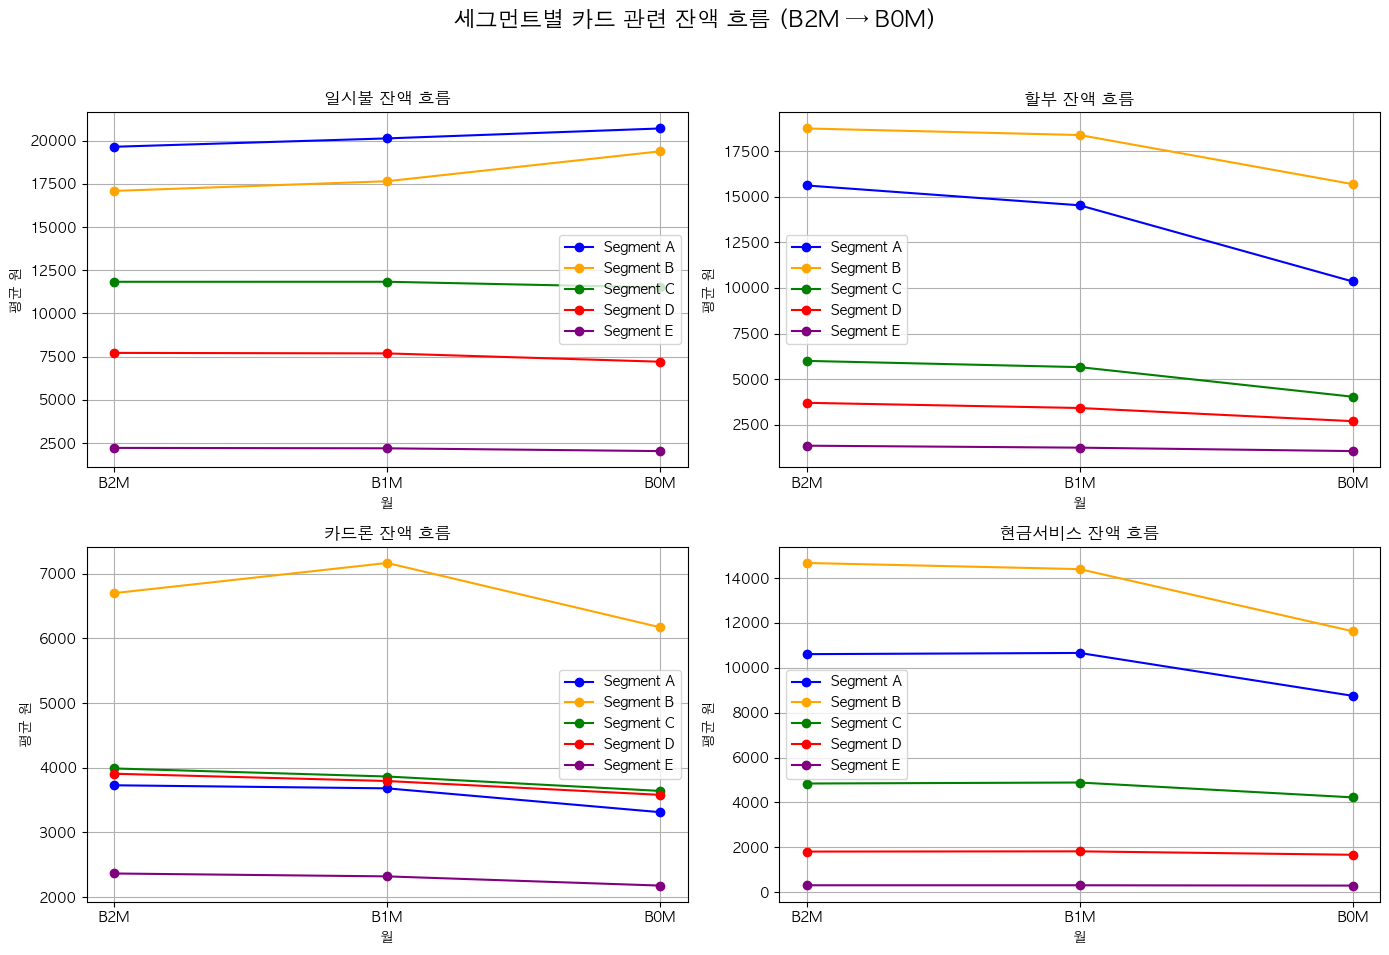

In [13]:
import matplotlib.pyplot as plt

# 시리즈별 컬럼 그룹
categories = {
    '일시불': ['잔액_일시불_B2M', '잔액_일시불_B1M', '잔액_일시불_B0M'],
    '할부': ['잔액_할부_B2M', '잔액_할부_B1M', '잔액_할부_B0M'],
    '카드론': ['잔액_카드론_B2M', '잔액_카드론_B1M', '잔액_카드론_B0M'],
    '현금서비스': ['잔액_현금서비스_B2M', '잔액_현금서비스_B1M', '잔액_현금서비스_B0M'],
}

segments = sorted(df['Segment'].unique())
colors = ['blue', 'orange', 'green', 'red', 'purple']

# figure 설정
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for i, (category, col_list) in enumerate(categories.items()):
    ax = axs[i]

    for segment, color in zip(segments, colors):
        segment_df = df[df['Segment'] == segment]

        # 수치형 컬럼만 선택해서 평균 계산
        avg_values = segment_df[col_list].apply(pd.to_numeric, errors='coerce').mean().values

        ax.plot(['B2M', 'B1M', 'B0M'], avg_values, label=f'Segment {segment}', marker='o', color=color)

    ax.set_title(f"{category} 잔액 흐름")
    ax.set_xlabel("월")
    ax.set_ylabel("평균 원")
    ax.grid(True)
    ax.legend()

plt.suptitle("세그먼트별 카드 관련 잔액 흐름 (B2M → B0M)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


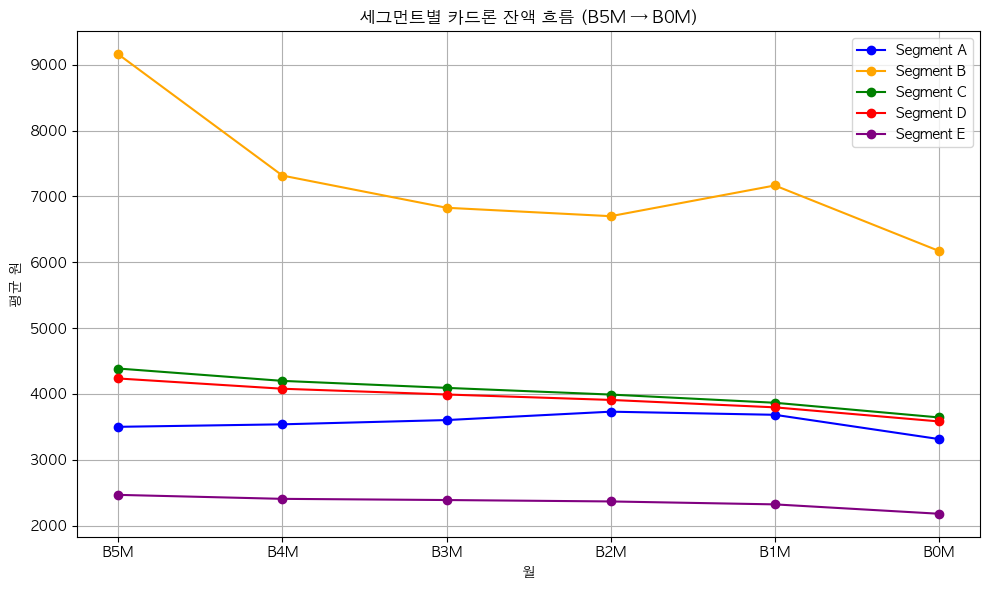

In [15]:
import matplotlib.pyplot as plt

# 카드론 흐름 분석용 컬럼
cardloan_cols = ['잔액_카드론_B5M', '잔액_카드론_B4M', '잔액_카드론_B3M',
                 '잔액_카드론_B2M', '잔액_카드론_B1M', '잔액_카드론_B0M']
months = ['B5M', 'B4M', 'B3M', 'B2M', 'B1M', 'B0M']

plt.figure(figsize=(10, 6))

for segment, color in zip(segments, colors):
    seg_df = df[df['Segment'] == segment]
    values = seg_df[cardloan_cols].apply(pd.to_numeric, errors='coerce').mean().values
    plt.plot(months, values, label=f'Segment {segment}', marker='o', color=color)

plt.title("세그먼트별 카드론 잔액 흐름 (B5M → B0M)")
plt.xlabel("월")
plt.ylabel("평균 원")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# 필터할 컬럼
cols = [
    'Segment', '기준년월',
    '잔액_현금서비스_B0M', '잔액_카드론_B0M', '잔액_일시불_B0M', '잔액_할부_B0M',
    '잔액_현금서비스_B1M', '잔액_현금서비스_B2M',
    '잔액_카드론_B1M', '잔액_카드론_B2M', '잔액_카드론_B3M', '잔액_카드론_B4M', '잔액_카드론_B5M',
    '잔액_일시불_B1M', '잔액_일시불_B2M',
    '잔액_할부_B1M', '잔액_할부_B2M',
]

# 필요한 컬럼만 불러오기
df = pd.read_csv("../data/train/5.잔액정보/train_잔액정보_clesr.csv", usecols=cols)
df

,기준년월,잔액_일시불_B0M,잔액_할부_B0M,잔액_현금서비스_B0M,잔액_카드론_B0M,잔액_현금서비스_B1M,잔액_현금서비스_B2M,잔액_카드론_B1M,잔액_카드론_B2M,잔액_카드론_B3M,잔액_카드론_B4M,잔액_카드론_B5M,잔액_할부_B1M,잔액_할부_B2M,잔액_일시불_B1M,잔액_일시불_B2M,Segment
0,201807,998,962,22971,0,27930,24580,0,0,0,0,0,640,805,736,1083,D
1,201807,2565,2390,0,0,0,0,0,0,0,0,0,2779,2699,6795,1424,E
2,201807,5312,5113,21531,0,26452,22118,0,0,0,0,0,9451,4233,5150,6143,C
3,201807,730,5025,26284,0,34054,30526,0,0,0,0,0,6134,3719,462,708,D
4,201807,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,E
2399996,201812,3351,0,0,27337,0,0,26681,25886,33056,26788,30591,0,0,4142,4362,D
2399997,201812,2524,2960,0,0,0,0,0,0,0,0,0,3291,3474,1523,2898,C
2399998,201812,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,E


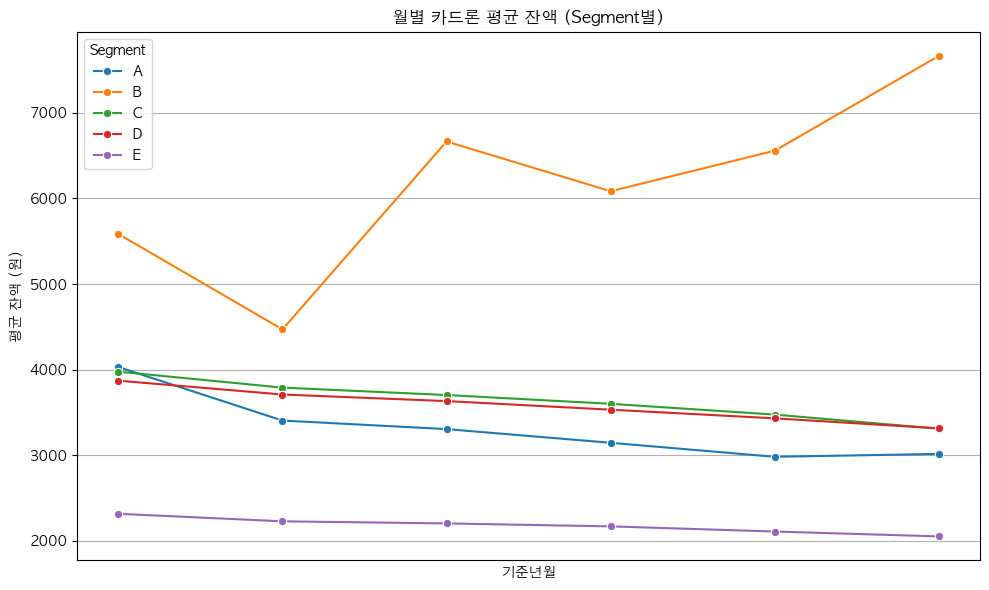

In [25]:
df['기준년월'] = pd.to_datetime(df['기준년월'])

# 월별 평균 B0M 추세
monthly_avg = df.groupby(['기준년월', 'Segment'])['잔액_카드론_B0M'].mean().reset_index()

# 시각화 예시
import seaborn as sns
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_avg, x='기준년월', y='잔액_카드론_B0M', hue='Segment', marker='o')
plt.title("월별 카드론 평균 잔액 (Segment별)")
plt.ylabel("평균 잔액 (원)")
plt.xlabel("기준년월")
plt.grid(True)
plt.tight_layout()
plt.show()


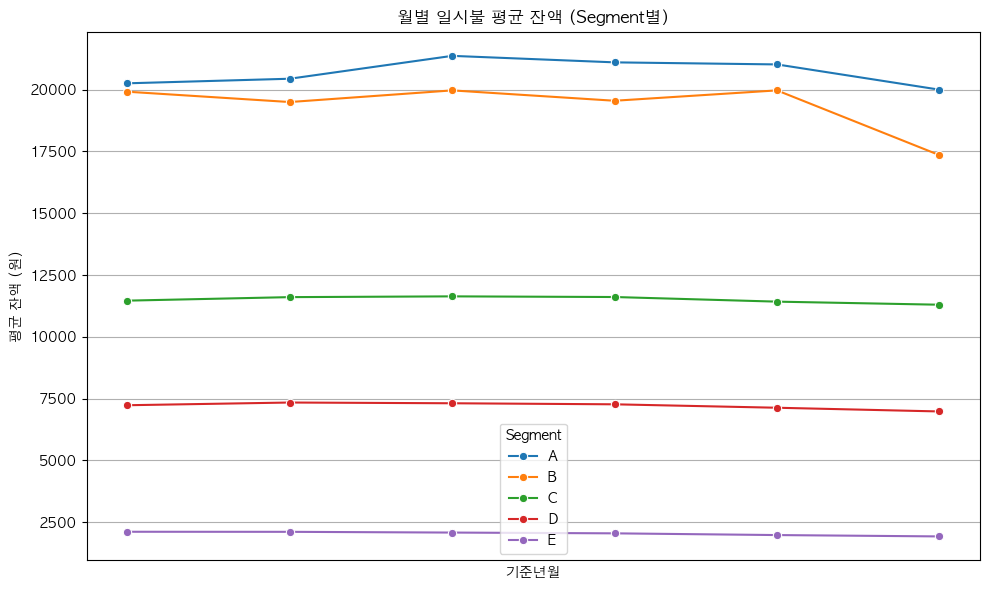

In [27]:
df['기준년월'] = pd.to_datetime(df['기준년월'])

# 월별 평균 B0M 추세
monthly_avg = df.groupby(['기준년월', 'Segment'])['잔액_일시불_B0M'].mean().reset_index()

# 시각화 예시
import seaborn as sns
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_avg, x='기준년월', y='잔액_일시불_B0M', hue='Segment', marker='o')
plt.title("월별 일시불 평균 잔액 (Segment별)")
plt.ylabel("평균 잔액 (원)")
plt.xlabel("기준년월")
plt.grid(True)
plt.tight_layout()
plt.show()


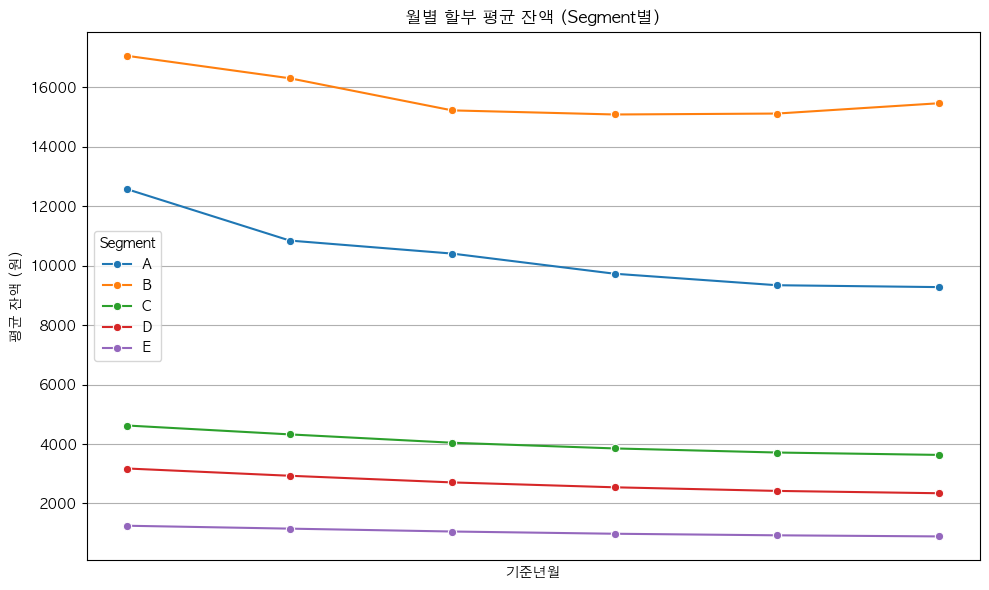

In [33]:

df['기준년월'] = pd.to_datetime(df['기준년월'])

# 월별 평균 B0M 추세
monthly_avg = df.groupby(['기준년월', 'Segment'])['잔액_할부_B0M'].mean().reset_index()

# 시각화 예시
import seaborn as sns
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_avg, x='기준년월', y='잔액_할부_B0M', hue='Segment', marker='o')
plt.title("월별 할부 평균 잔액 (Segment별)")
plt.ylabel("평균 잔액 (원)")
plt.xlabel("기준년월")
plt.grid(True)
plt.tight_layout()
plt.show()


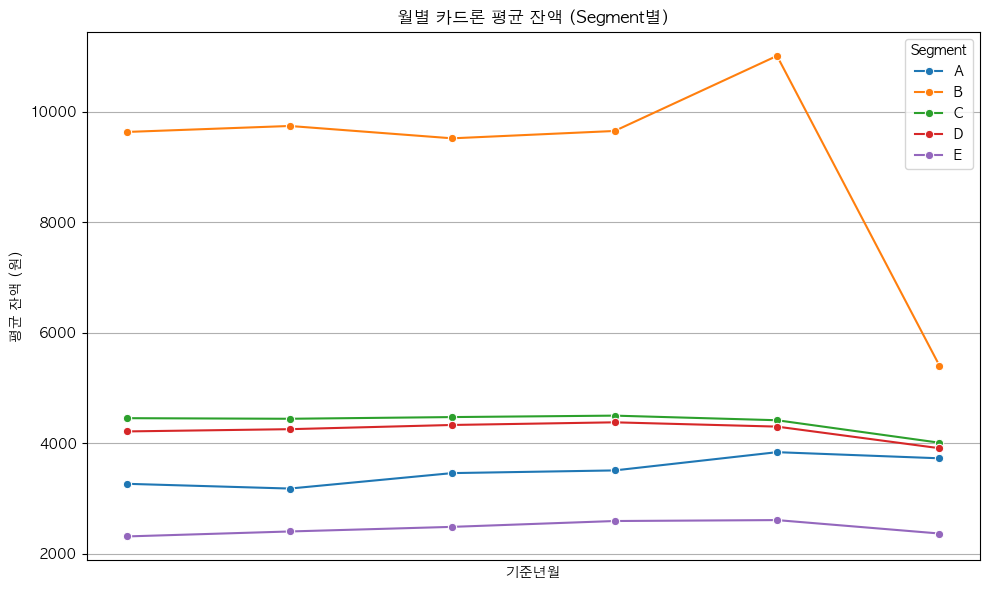

In [44]:
df['기준년월'] = pd.to_datetime(df['기준년월'])

# 월별 평균 B0M 추세
monthly_avg = df.groupby(['기준년월', 'Segment'])['잔액_카드론_B5M'].mean().reset_index()

# 시각화 예시
import seaborn as sns
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_avg, x='기준년월', y='잔액_카드론_B5M', hue='Segment', marker='o')
plt.title("월별 카드론 평균 잔액 (Segment별)")
plt.ylabel("평균 잔액 (원)")
plt.xlabel("기준년월")
plt.grid(True)
plt.tight_layout()
plt.show()


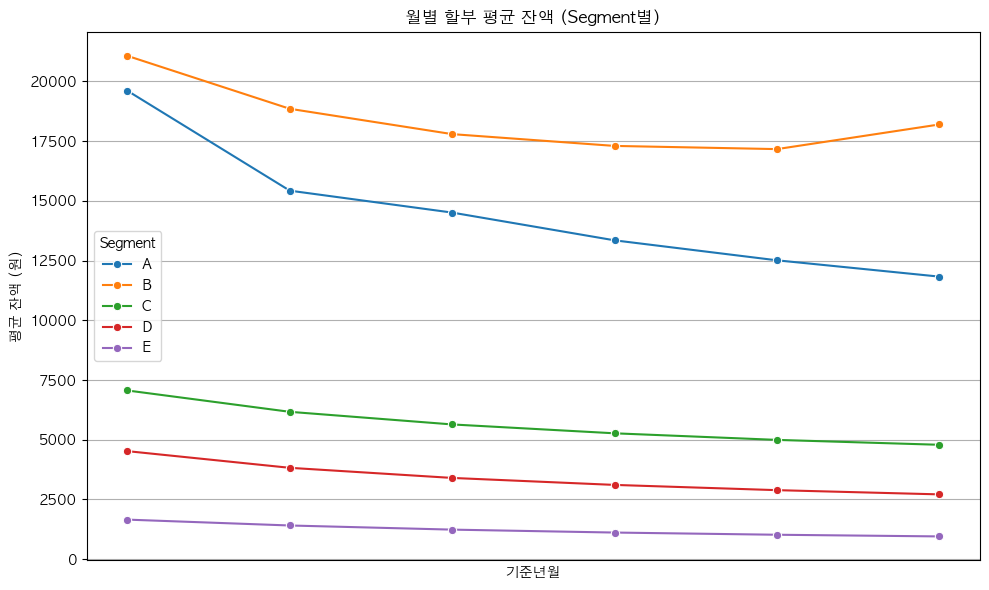

In [48]:
df['기준년월'] = pd.to_datetime(df['기준년월'])

# 월별 평균 B0M 추세
monthly_avg = df.groupby(['기준년월', 'Segment'])['잔액_할부_B1M'].mean().reset_index()

# 시각화 예시
import seaborn as sns
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_avg, x='기준년월', y='잔액_할부_B1M', hue='Segment', marker='o')
plt.title("월별 할부 평균 잔액 (Segment별)")
plt.ylabel("평균 잔액 (원)")
plt.xlabel("기준년월")
plt.grid(True)
plt.tight_layout()
plt.show()
